In [2]:
import urllib.request
import librosa
from IPython import display

In [55]:
file_name = '2776.mp3'
url = f'https://bigsoundbank.com/UPLOAD/mp3/{file_name}'

urllib.request.urlretrieve(url, file_name)

sound_data, samplerate = librosa.load(file_name)

print(f'Number of samples: {sound_data.size}\nSample rate: {samplerate}')

Number of samples: 126479
Sample rate: 22050


In [5]:
display.display(display.Audio(data=sound_data, rate=samplerate))

In [56]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

In [57]:
audio_fft = fft(sound_data)
print(audio_fft.shape)

(126479,)


In [58]:
n = sound_data.size

audio_freqs = fftfreq(n = n, d = 1 / samplerate)
magnitude = np.abs(audio_fft)

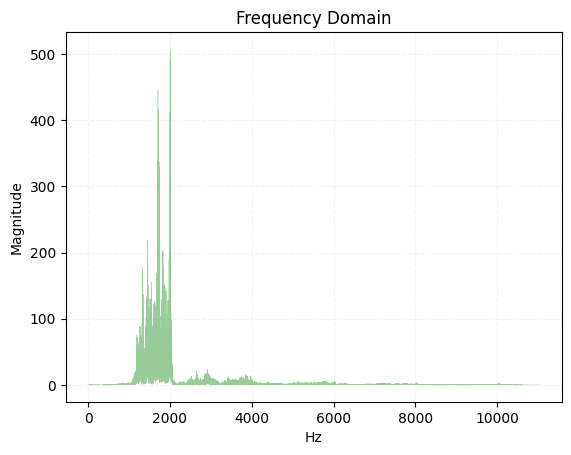

In [60]:
plt.plot(audio_freqs[:n//2], magnitude[:n//2], color = 'green', linewidth = 0.3, alpha = 0.4)
plt.title('Frequency Domain')
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.grid(linestyle = '--', alpha = 0.15)
plt.show()

### The audio file is mostly made up of signals with frequencies below 2000 Hz.

In [61]:
file_name = '2666.mp3'
url = f'https://bigsoundbank.com/UPLOAD/mp3/{file_name}'

urllib.request.urlretrieve(url, file_name)

sound_data, samplerate = librosa.load(file_name)

print(f'Number of samples: {sound_data.size}\nSample rate: {samplerate}')

Number of samples: 244491
Sample rate: 22050


In [62]:
display.display(display.Audio(data=sound_data, rate=samplerate))

In [63]:
n = sound_data.size

audio_fft = fft(sound_data)
audio_freqs = fftfreq(n = n, d = 1 / samplerate)
magnitude = np.abs(audio_fft)

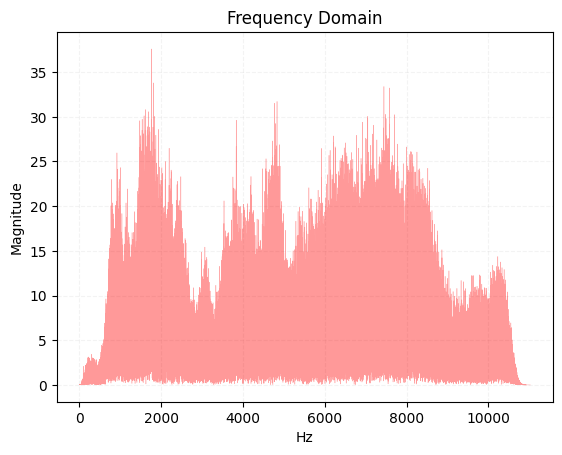

In [64]:
plt.plot(audio_freqs[:n//2], magnitude[:n//2], color = 'red', linewidth = 0.3, alpha = 0.4)
plt.title('Frequency Domain')
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.grid(linestyle = '--', alpha = 0.15)
plt.show()

### The new audio file is more complex, and harder to be decomposed using FFT. 

In [65]:
def sine_signal_generator(duration: float=1.0, samplerate: int=100, amplitude: float=1.0, frequency: float=1.0, shift: float=0.0):
    # Number of samples for the whole period 
    n_samples = duration * samplerate       
    
    time_data = np.linspace(0, duration, n_samples)
    sine_data = amplitude * np.sin(2 * np.pi* frequency * (time_data + shift))
    sine_data = np.round(sine_data, decimals = 10)

    return time_data, sine_data

In [68]:
time, signal1 = sine_signal_generator(duration = 3, samplerate = 1000, amplitude = 1, frequency = 5)
time, signal2 = sine_signal_generator(duration = 3, samplerate = 1000, amplitude = 1, frequency = 30)

added_signals = signal1 + signal2

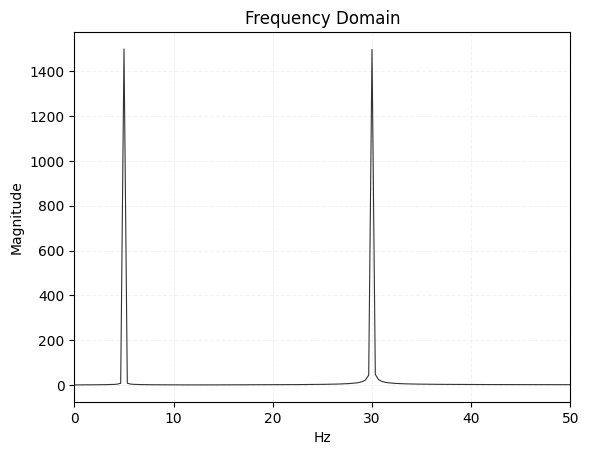

In [81]:
signals_fft = fft(added_signals)
signals_freqs = fftfreq(n = 3000, d = 1 / 1000)
magnitude = np.abs(signals_fft)

plt.plot(signals_freqs[:1500], magnitude[:1500], color = 'black', linewidth = 0.8, alpha = 0.8)
plt.title('Frequency Domain')
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.xlim(0, 50)
plt.grid(linestyle = '--', alpha = 0.15)
plt.show()